# **Hierarchical Clustering - Small Example**


---

## Functions
* `hclust()` Performs the hierarchical clustering
* `dist()`   Calculates the distance matrix for the clustering
* `scale()`  Scales the variables to mean 0, sd 1
* `rect.hclust()`  For visualization of clustering
* `cutree()`  To cut the tree (select a number of clusters)

<br>

---

## `mtcars` dataset

In [ ]:
# store mtcars data as dat
dat <- mtcars

head(dat)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


<br>

Quick example on clustering by horsepower and quarter-mile time

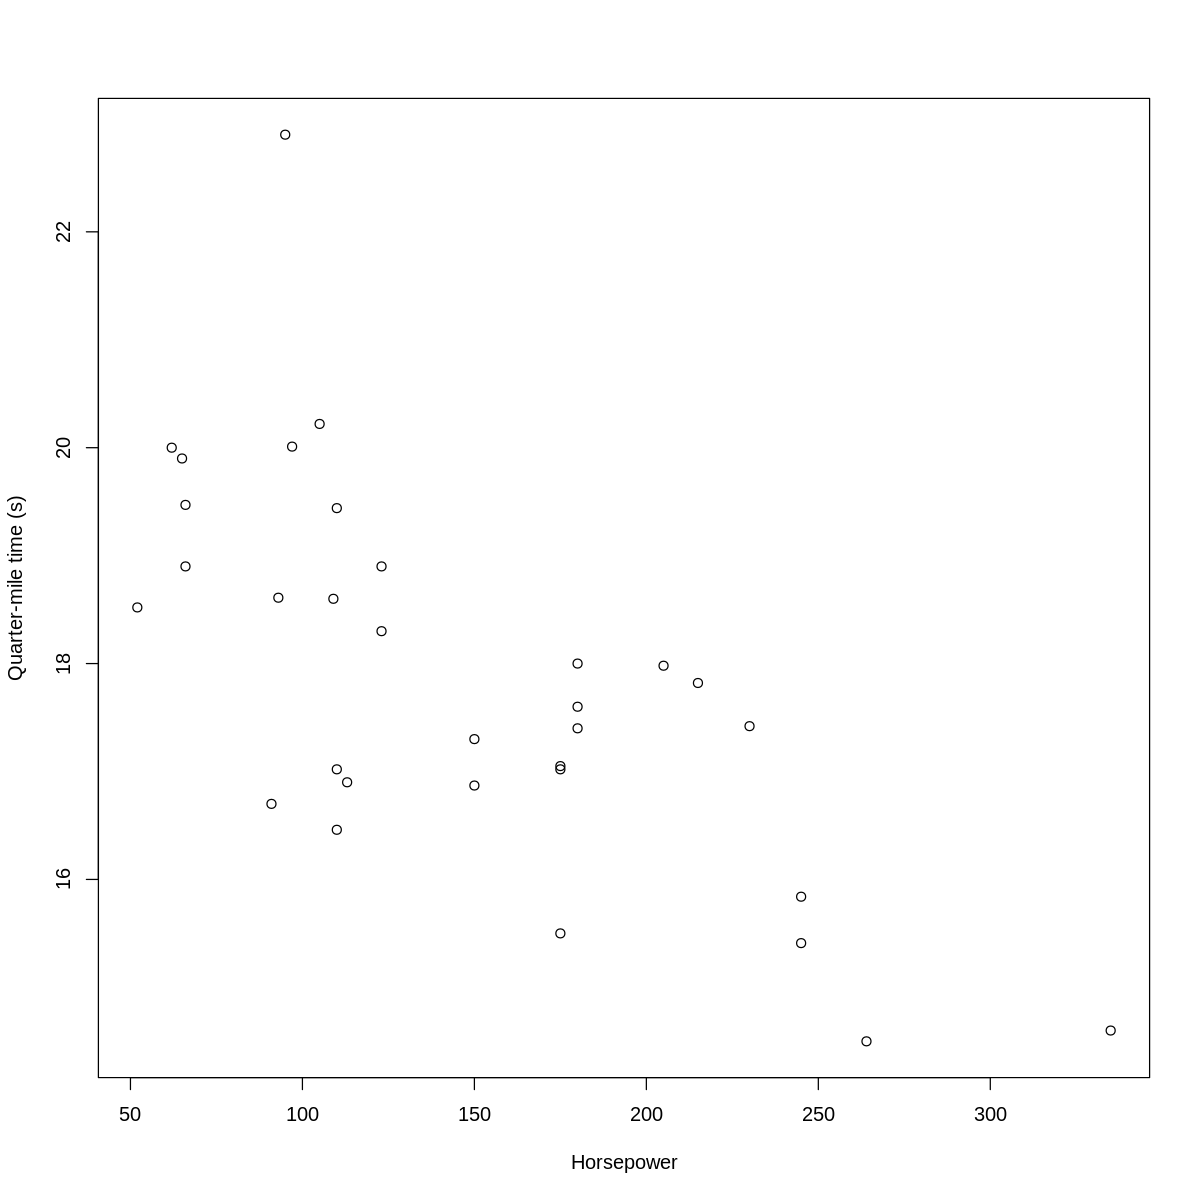

In [ ]:
plot(dat$hp, dat$qsec, 
     xlab = "Horsepower",
     ylab = "Quarter-mile time (s)")

<br>

Euclidean distance is sensitive to scaling, therefore, we must transform all our variables to the same scale

In [ ]:
# scale each variable to standard deviation 1
mat <- scale(dat)

head(mat)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.610399567,-0.7771651,-0.8680278,1.1899014,0.4235542,0.7352031
Mazda RX4 Wag,0.1508848,-0.1049878,-0.57061982,-0.5350928,0.5675137,-0.349785269,-0.4637808,-0.8680278,1.1899014,0.4235542,0.7352031
Datsun 710,0.4495434,-1.2248578,-0.99018209,-0.7830405,0.4739996,-0.917004624,0.4260068,1.1160357,1.1899014,0.4235542,-1.1221521
Hornet 4 Drive,0.2172534,-0.1049878,0.22009369,-0.5350928,-0.9661175,-0.002299538,0.8904872,1.1160357,-0.8141431,-0.9318192,-1.1221521
Hornet Sportabout,-0.2307345,1.0148821,1.04308123,0.4129422,-0.8351978,0.227654255,-0.4637808,-0.8680278,-0.8141431,-0.9318192,-0.5030337
Valiant,-0.3302874,-0.1049878,-0.04616698,-0.6080186,-1.5646078,0.248094592,1.3269868,1.1160357,-0.8141431,-0.9318192,-1.1221521


In [ ]:
# scale changes class from dataframe to matrix
class(mat)

# standard deviations should all be the same
print(apply(mat, 2, sd))

[1] "matrix" "array"

 mpg  cyl disp   hp drat   wt qsec   vs   am gear carb 
   1    1    1    1    1    1    1    1    1    1    1 


<br>

#### Hierachical Clustering


In [ ]:
# calculate a distance matrix
dist_matrix <- dist(mat[, c("hp", "qsec")])

dist_matrix

In [ ]:
clust <- hclust(dist_matrix, 
                method = "complete",  # default
                )

class(clust)

[1] "hclust"

In [ ]:
clust


Call:
hclust(d = dist_matrix, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 32 


<br>

Visualize dendrogram

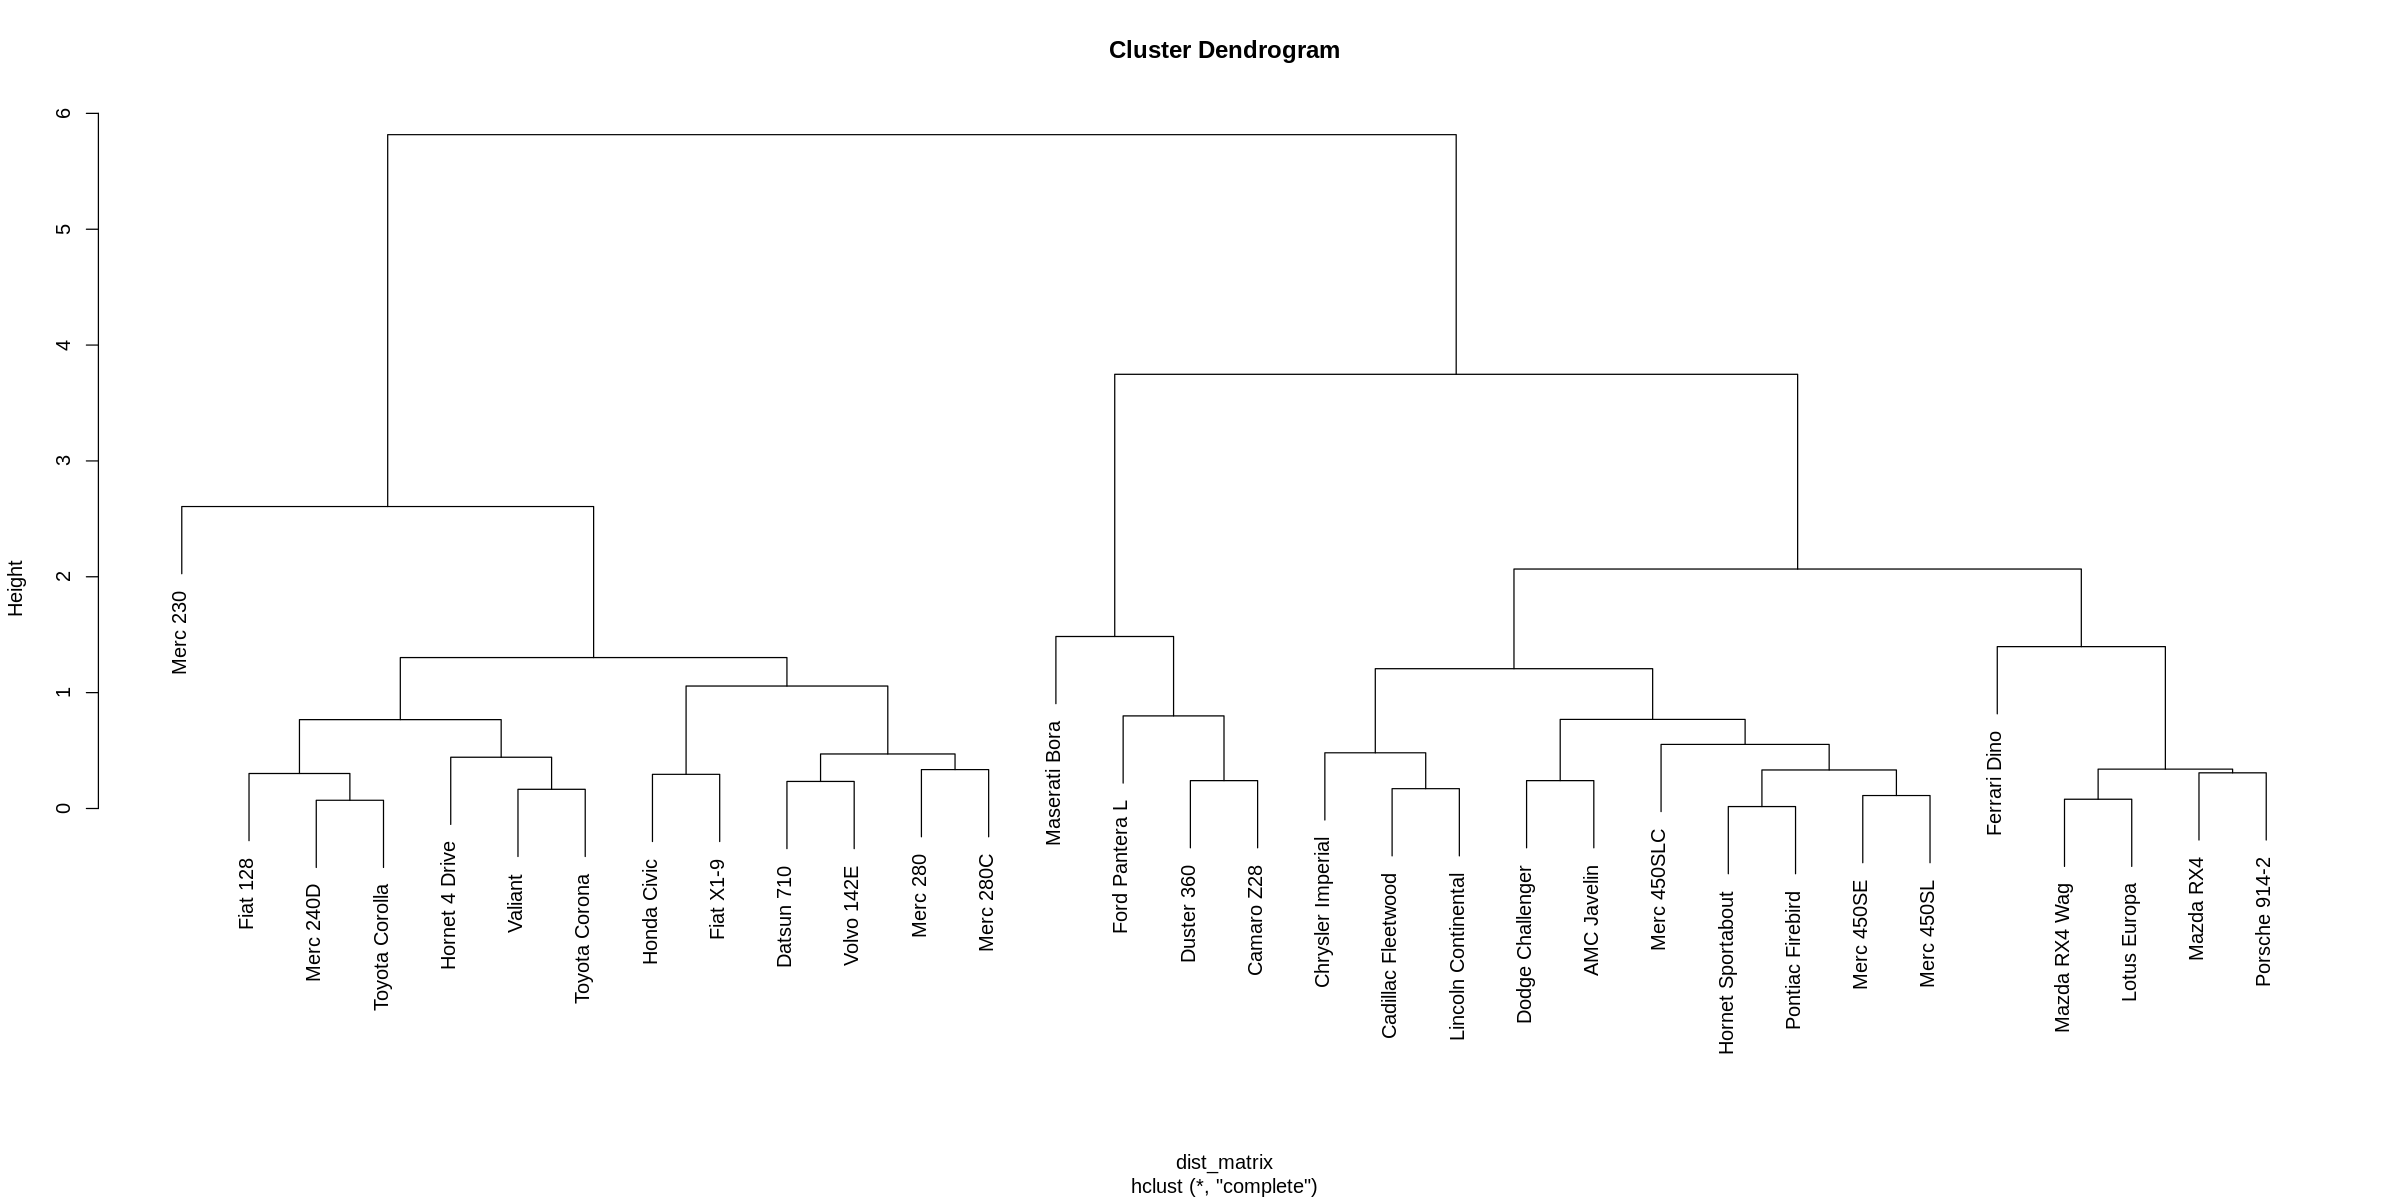

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)
plot(clust)

<br>

Select number of clusters using an elbow plot

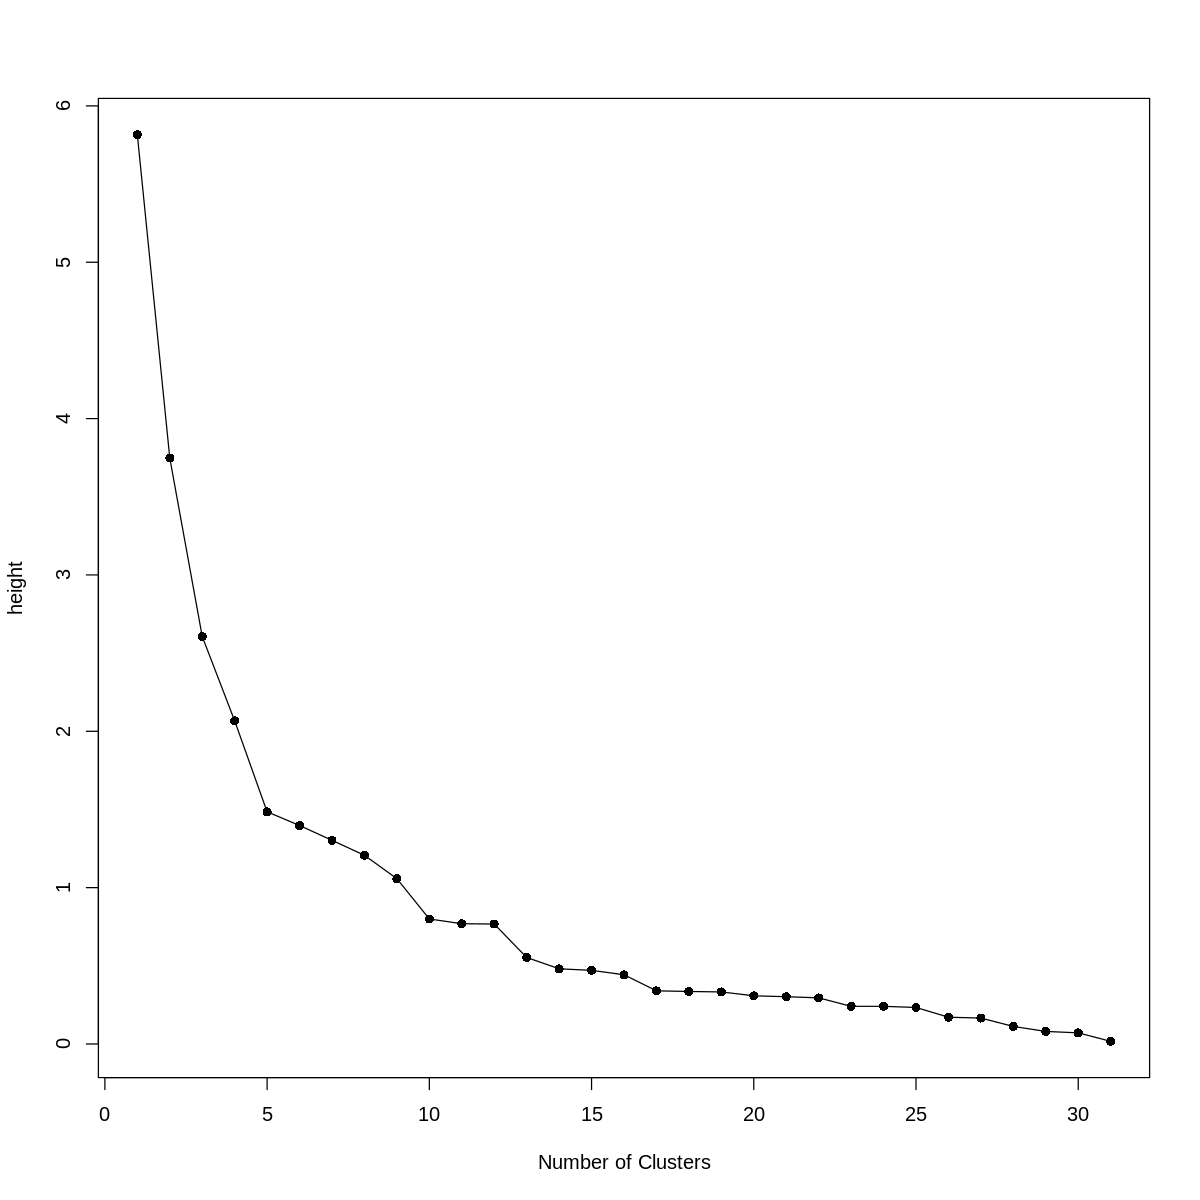

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

plot((nrow(dat) - 1):1, clust$height, 
     type = "o", pch = 16,
     xlab = "Number of Clusters",
     ylab = "height"
     )

<br>

Visualize dendrogram with a cutoff

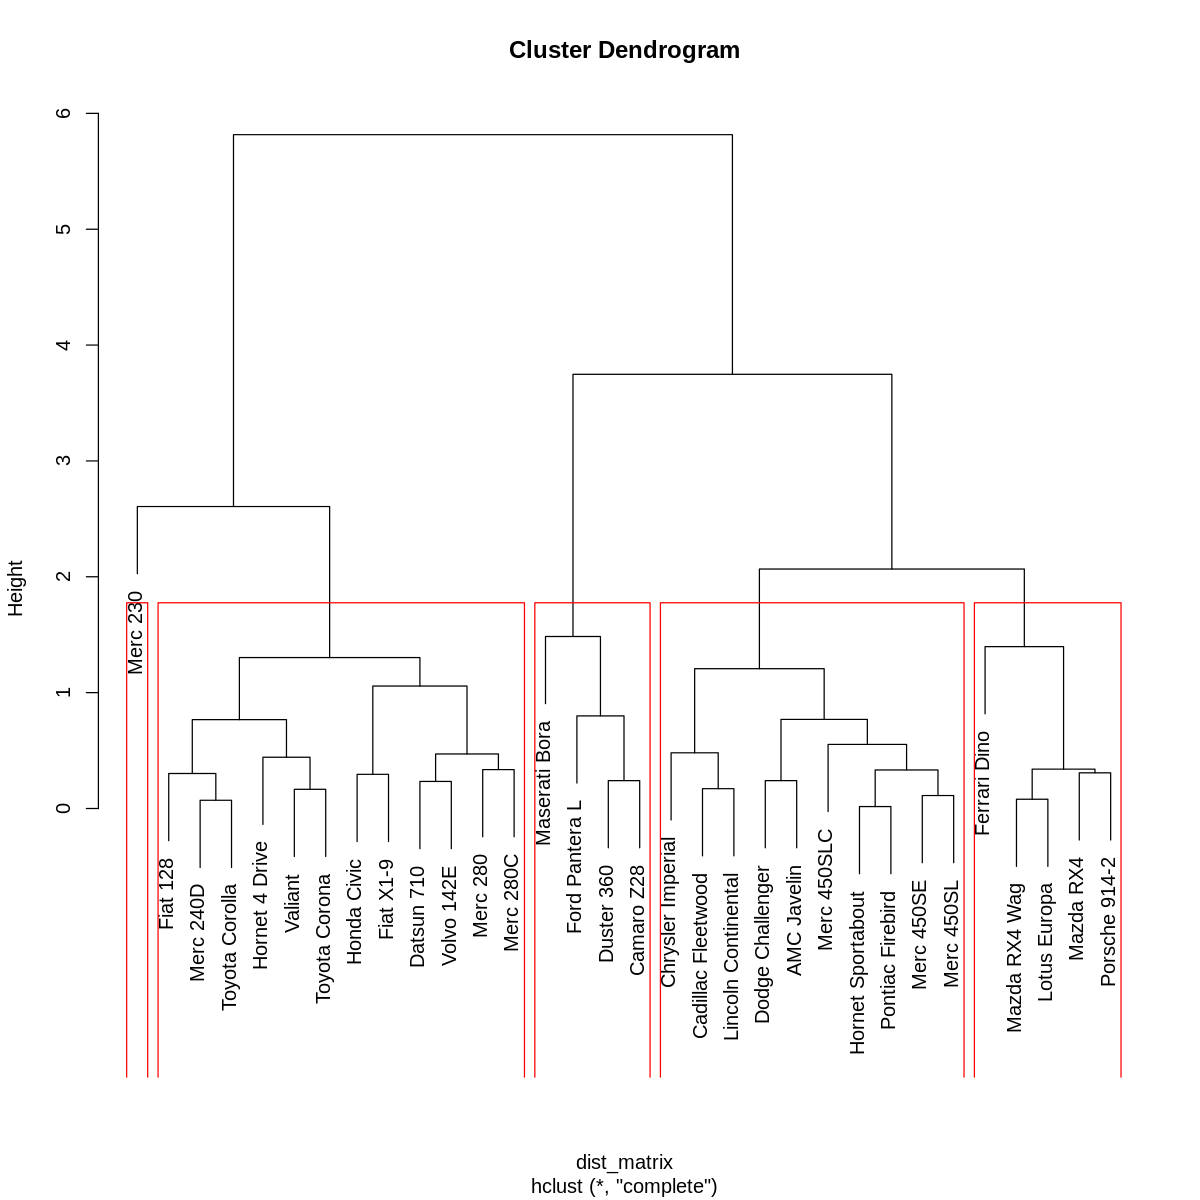

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

plot(clust)

# rect.hclust() highlights the clusters you have selected
rect.hclust(clust,
            k = 5, # k is used to specify the number of clusters
            border = "red")

<br>

Visualize clustering with cut at 5 clusters

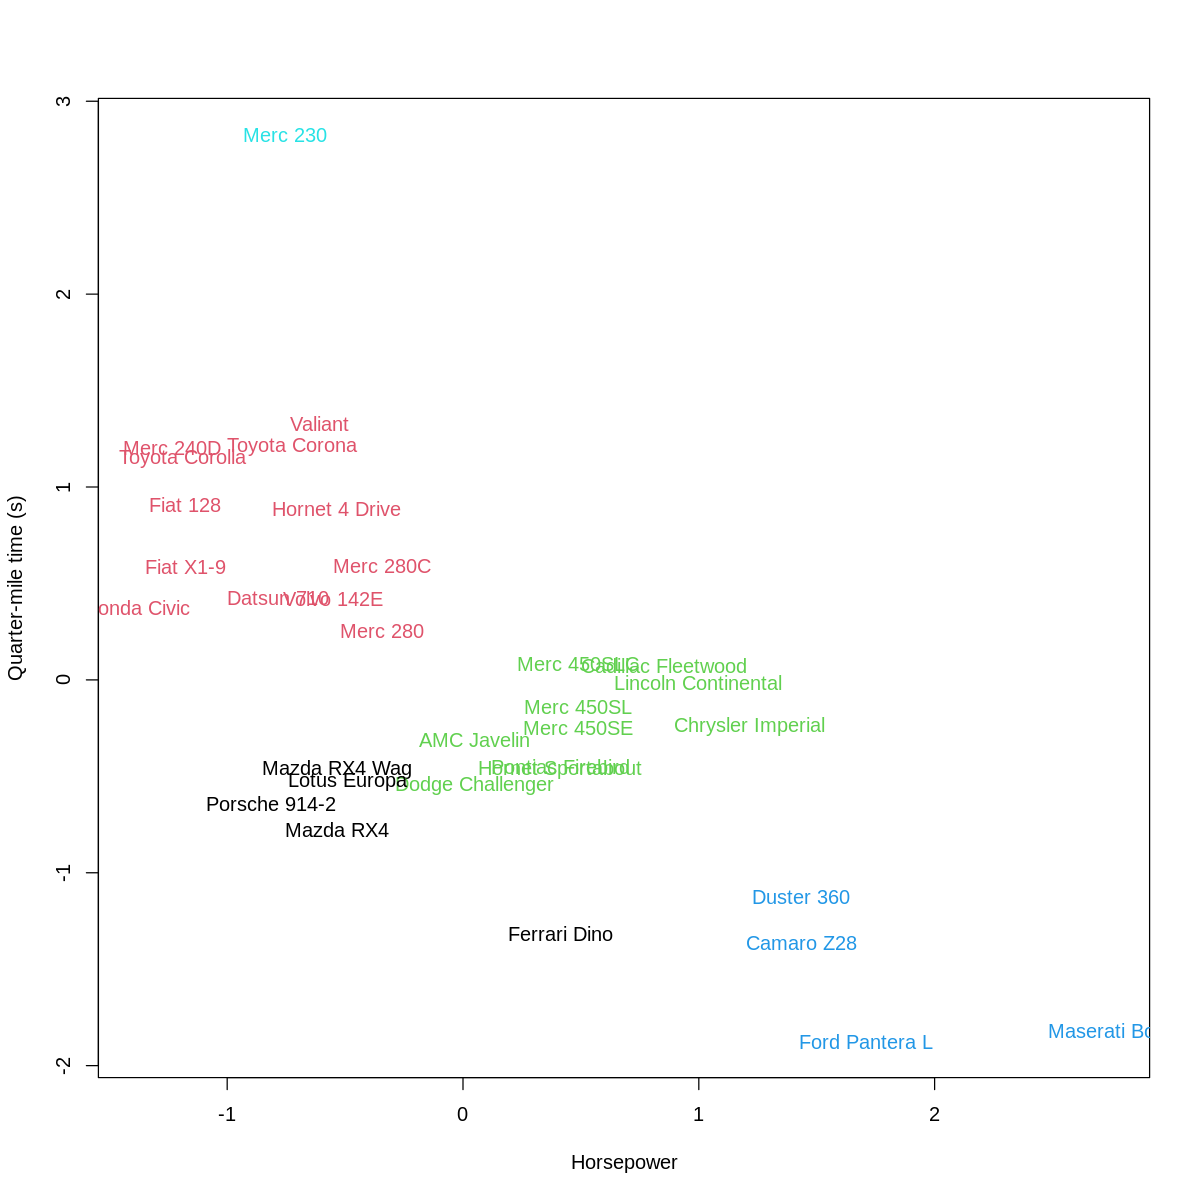

In [ ]:
clust_cut <- cutree(clust, k = 5)

options(repr.plot.width=10, repr.plot.height=10)

plot(mat[,"hp"], mat[,"qsec"], col = NA, 
     xlab = "Horsepower",
     ylab = "Quarter-mile time (s)")
text(mat[,"hp"], mat[,"qsec"], rownames(dat), col = clust_cut)

<br>

Visualize dendrogram with a cutoff

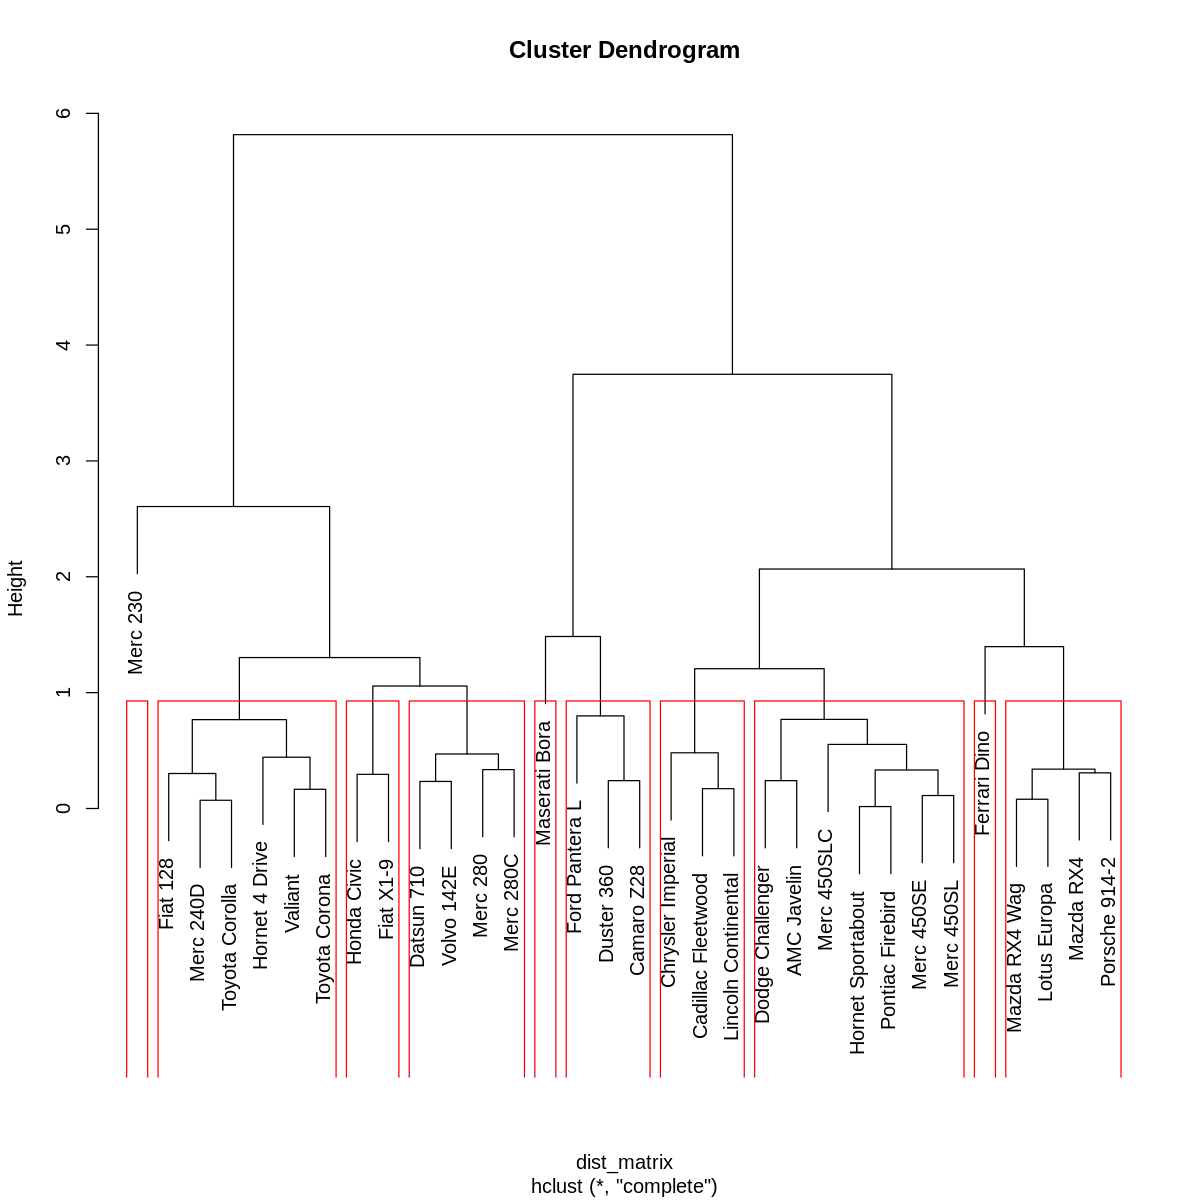

In [ ]:
options(repr.plot.width=10, repr.plot.height=10)

plot(clust)

# rect.hclust() highlights the clusters you have selected
rect.hclust(clust,
            k = 10, # k is used to specify the number of clusters
            border = "red")

<br>

Visualize clustering with cut at 10 clusters

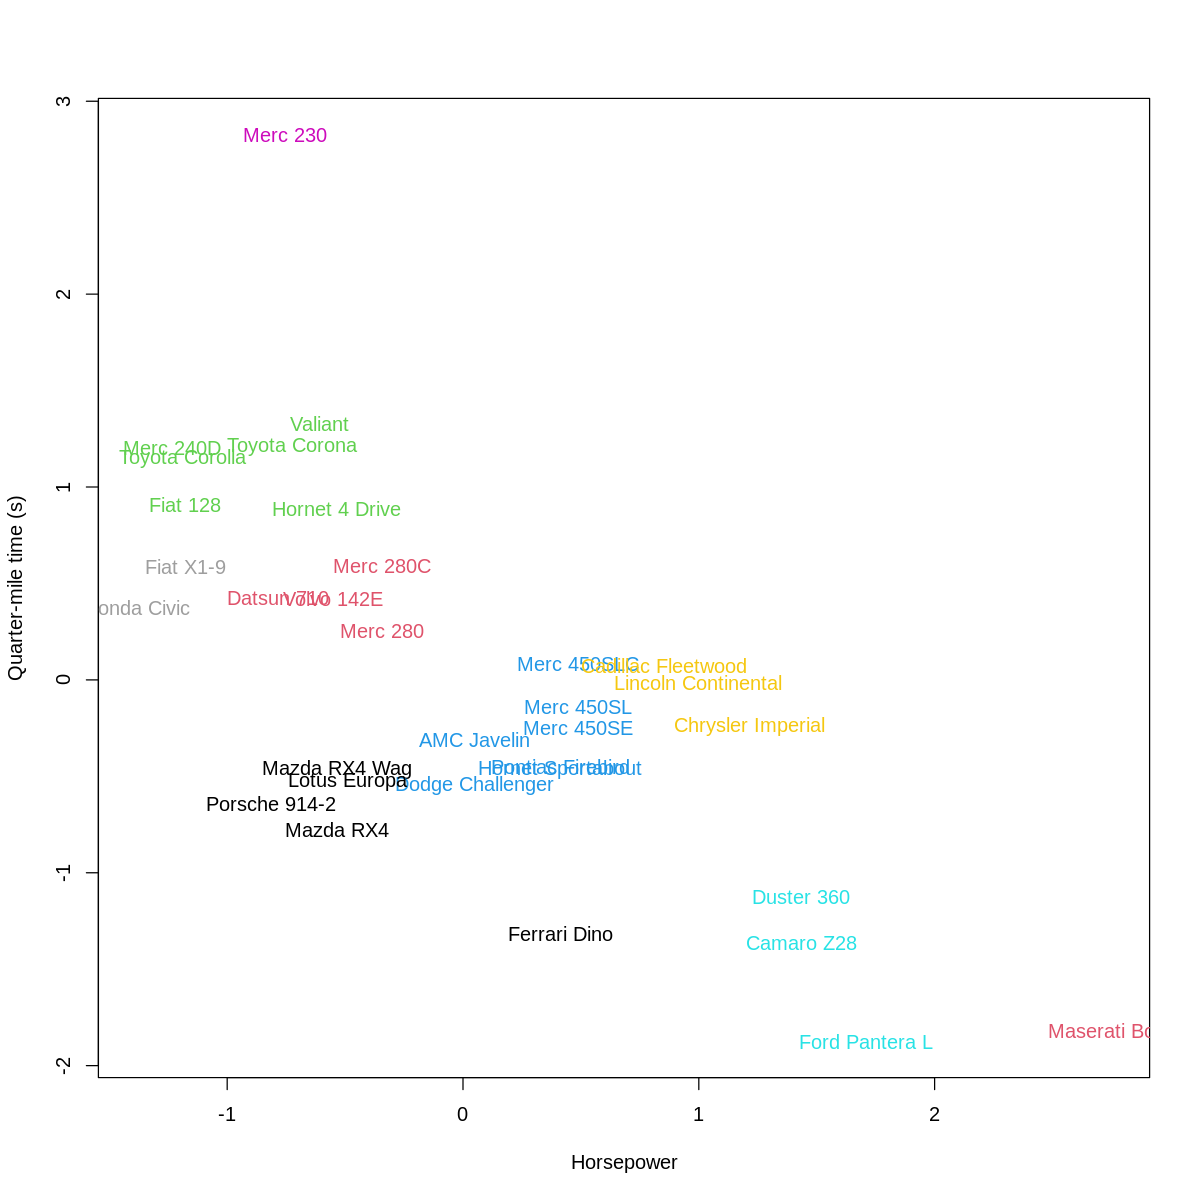

In [ ]:
clust_cut <- cutree(clust, k = 10)

options(repr.plot.width=10, repr.plot.height=10)

plot(mat[,"hp"], mat[,"qsec"], col = NA, 
     xlab = "Horsepower",
     ylab = "Quarter-mile time (s)")
text(mat[,"hp"], mat[,"qsec"], rownames(dat), col = clust_cut)